#Pandas

Pandas es una de las librerías más utilizadas en Python para el análisis y manipulación de datos. Proporciona estructuras de datos flexibles y eficientes, como DataFrames y Series, que permiten trabajar con datos estructurados de manera similar a hojas de cálculo o bases de datos.

En este cuaderno se aborda como crear y manipular Dataframes, el tipo de datos más flexible de Pandas.

Por:

Ferney Orlando Amaya Fernández

###Se importan las librerías
Para realizar operaciones con Pandas debe importarse la librería pandas. En este cuaderno también se emplean las librerías numpy y matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1.Crear Dataframes

Se presentan diferentes formas de crear Dataframes.

##1.1. A partir de diccionarios y listas

La siguiente Tabla se presenta como ejemplo para generar un Dataframe de diferentes formas:

|index|	A |	B |
|-----|---|---|
|0|1|x|
|1|2|y|

- En forma de diccionario, cada columna es una lista:

In [ ]:
pd.DataFrame({"A": [1, 2], "B": ["x", "y"]})

- En forma de lista, cada fila es un diccionario

In [ ]:
pd.DataFrame([{"A": 1, "B": "x"}, {"A": 2, "B": "y"}])

- En forma de lista, cada fila es una lista, se definen los nombres de las columnas

In [ ]:
pd.DataFrame([[1, "x"], [2, "y"]], columns=["A", "B"])

##1.2. Crear un Dataframe a partir de un arreglo en Numpy

In [ ]:
pd.DataFrame(np.array([[1, 2], [3, 4]]), columns=["A", "B"])

## 1.3. A partir de archivos

Pueden también crearse Dataframes a partir de archivos en formato csv, JSON o Excel.
A continuación se creará un Dataframe a partir de un archivo en formato csv suministrando en enlace al archivo:

In [ ]:
enlace_csv = 'https://github.com/FerneyOAmaya/Competencias-Digitales/blob/master/H2020Medellin.csv?raw=true'
df = pd.read_csv(enlace_csv)

A continuación se creará un Dataframe a partir de un archivo en formato Excel suministrando el enlace al archivo:

In [ ]:
enlace_xlsx = 'https://github.com/FerneyOAmaya/Competencias-Digitales/blob/master/DB_AnalisisDatos.xlsx?raw=true'
df = pd.read_excel(enlace_xlsx, sheet_name=0) #Abre la prinera hoja

Cuando se abre un archivo como un .csv o .xlsx desde un URL de GitHub, se está viendo una página HTML de vista previa, no el archivo real. Al añadir *raw=true?* a la URL se le dice a GitHub que no muestre la vista previa del archivo, si no que entregue el archivo real (bruto=raw).

#2.Exploración inicial de un Dataframe

A continuación se presentan las formas de exploración inicial que pueden realizarse sobre un Dataframe.

Se creará inicialmente el Dataframe  *df* a partir de un archivo en Excel.

In [ ]:
enlace_xlsx = 'https://github.com/FerneyOAmaya/Competencias-Digitales/blob/master/DB_AnalisisDatos.xlsx?raw=true'
df = pd.read_excel(enlace_xlsx, sheet_name=0) #Abre la prinera hoja

Las operaciones son las siguientes:
- Ver la dimensión de la tabla:

In [ ]:
df.shape

(789, 9)

- Tipo de datos de cada columna:

In [ ]:
df.dtypes

,0
ID,int64
Edad,object
Género,object
Departamento,object
Ciudad,object
Fecha,datetime64[ns]
Producto,object
Costo,int64
Evaluación Servicio,float64


- Ver primeras filas:

In [ ]:
df.head(3) #Muestra las primeras 3 filas

- Ver últimas filas:

In [ ]:
df.tail(2) #Muestra las últimas 2 filas.

- Información del DataFrame:

In [ ]:
df.info() #Muestra tipos de datos y valores no nulos para cada columna del Dataframe

- Presenta un resumen estadístico de las columnas numéricas del Dataframe:

In [ ]:
df.describe()

#3.Acceder a elementos de un Dataframe

Los ejemplos para acceder a un Dataframe se realizarán a partir de la siguiente tabla:

|Index|'Nombre'|'Edad'|'Ciudad'|
|-|-|-|-|
|'a'|'Ana'|23|'Lima'|
|'b'|'Luis'|25|'Bogotá'|
|'c'|'Carlos'|30|'Quito'|

El código para crear el Dataframe es el siguiente:

In [ ]:
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [23, 25, 30],
    'Ciudad': ['Lima', 'Bogotá', 'Quito']
}, index=['a', 'b', 'c'])

##3.1. Acceso a nombres de columnas

Los nombres de las columnas se pueden obtener de la siguiente forma:

In [ ]:
df.columns

Index(['Nombre', 'Edad', 'Ciudad'], dtype='object')

##3.2. Acceso a Columnas

Se puede acceder a las columnas de un DataFrame de varias formas. Aquí se presentan dos:

- Por nombre, solo si el nombre no tiene espacios ni caracteres especiales:
```
df.nombre_columna
```
Por ejemplo, para acceder a los nombres se emplea:

In [ ]:
df.Nombre

,Nombre
a,Ana
b,Luis
c,Carlos


- Usando corchetes con el nombre de la columna:
```
df['nombre_columna']
```
Por ejemplo, para acceder a las ciudades se emplea:

In [ ]:
df['Ciudad']

,Ciudad
a,Lima
b,Bogotá
c,Quito


- Si se quiere acceder a varias columnas:

In [ ]:
df[['Nombre', 'Edad']]

,Nombre,Edad
a,Ana,23
b,Luis,25
c,Carlos,30


##3.3. Uso de `loc[]`
loc permite acceder a datos del Dataframe empleando etiquetas, es decir, los nombres de filas (etiquetas de los índices) y columnas.

Para acceder a un valor específico se emplea:
```
df.loc[etiqueta_fila, nombre_columna]
```
Se presentan varios ejemplos:
- Acceder a una fila:

In [ ]:
df.loc['b']        	# Fila con etiqueta 'b'

,b
Nombre,Luis
Edad,25
Ciudad,Bogotá


- Acceder a una columna:

In [ ]:
df.loc[:, 'Edad']  	# Columna 'Edad'

,Edad
a,23
b,25
c,30


- Acceder a un valor:


In [ ]:
df.loc['c', 'Ciudad'] 	# Valor específico

'Quito'

##3.4. Uso de `iloc[]`
iloc permite acceder a datos del Dataframe empleando las posiciones numéricas (índices enteros) como si fueran listas.

Para acceder a un valor específico se emplea:
```
df.iloc[posicion_fila, posicion_columna]
```
Se presentan varios ejemplos:
- Acceder a una fila:

In [ ]:
df.iloc[1]       	# Segunda fila, fila 1

,b
Nombre,Luis
Edad,25
Ciudad,Bogotá


- Acceder a una columna:

In [ ]:
df.iloc[:, 2]      	# Tercera columna, columna 2

,Ciudad
a,Lima
b,Bogotá
c,Quito


- Acceder a un valor:

In [ ]:
df.iloc[1, 2] 		# Valor específico, fila 1, columna 2

'Bogotá'

##3.5. Acceso a índices
Los índices de un DataFrame se pueden acceder mediante:


In [ ]:
df.index

Index(['a', 'b', 'c'], dtype='object')

##3.6. Acceso a los valores
Para obtener todos los valores como un arreglo se emplea:

In [ ]:
df.values

array([['Ana', 23, 'Lima'],
       ['Luis', 25, 'Bogotá'],
       ['Carlos', 30, 'Quito']], dtype=object)

##3.7. Acceso a valores por condición
Se presentan algunos ejemplos:
- Acceder a todas las filas donde la columna 'Edad' es mayor a 25:


In [ ]:
df[df['Edad'] > 25]

,Nombre,Edad,Ciudad
c,Carlos,30,Quito


- Acceder a todas las filas donde la ciudad es 'Lima':

In [ ]:
df[df['Ciudad'] == 'Lima']

,Nombre,Edad,Ciudad
a,Ana,23,Lima


- Acceder a filas por condición. Se usa & (AND), | (OR), ~ (NOT). Se encierra cada condición en paréntesis. En este ejemplo se accede a las filas donde la edad está entre 24 y 30:


In [ ]:
df[(df['Edad'] >= 24) & (df['Edad'] <= 30)]

,Nombre,Edad,Ciudad
b,Luis,25,Bogotá
c,Carlos,30,Quito


- Para acceder a columnas específicas, normalmente se realiza después de aplicar una condición a las filas. Para acceder solo la columna 'Nombre' de las filas que cumplen la condición:

In [ ]:
df[df['Edad'] > 25]['Nombre']

,Nombre
c,Carlos



- También puede obtenerse el resultado anterior de la siguiente forma:


In [ ]:
df.loc[df['Edad'] > 25, 'Nombre']

,Nombre
c,Carlos


#4.Adicionar y eliminar filas y columnas

El siguiente Dataframe será empleado como ejemplo:

In [ ]:
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [23, 25, 30],
    'Ciudad': ['Lima', 'Bogotá', 'Quito']
}, index=['a', 'b', 'c'])

Para crear una nueva columna
```
df['NuevaColumna'] = [valor1, valor2, valor3, ...]
```
Por ejemplo, si queremos en el Dataframe anterior agregar una columna con el nombre "Edad+5" que tome el valor de la columna "Edad" y le sume 5 años:

In [ ]:
df['Edad+5'] = df['Edad'] + 5
print(df)

   Nombre  Edad  Ciudad  Edad+5
a     Ana    23    Lima      28
b    Luis    25  Bogotá      30
c  Carlos    30   Quito      35


Para eliminar columnas se puede emplear drop():
```
df.drop('Columna', axis=1, inplace=True)
```
- `axis=1` indica columna.
- `inplace=True` modifica el DataFrame original.

Por ejemplo, si queremos eliminar la columna creada en el numeral anterior:


In [ ]:
df.drop('Edad+5', axis=1, inplace=True)
print(df)

   Nombre  Edad  Ciudad
a     Ana    23    Lima
b    Luis    25  Bogotá
c  Carlos    30   Quito


Para adicionar filas puede usarse loc con un nuevo índice:
```
df.loc[nuevo_indice] = ['valor1', 'valor2', ...]
```
Por ejemplo:

In [ ]:
df.loc['d'] = ['Diego', 28, 'Arequipa']
print(df)

   Nombre  Edad    Ciudad
a     Ana    23      Lima
b    Luis    25    Bogotá
c  Carlos    30     Quito
d   Diego    28  Arequipa


Para eliminar filas podemos emplear drop() con el índice de fila:
```
df.drop(indice_fila, axis=0, inplace=True)
```
- `axis=0` indica fila.


In [ ]:
df.drop('d', axis=0, inplace=True)  # Elimina la fila con índice 2
print(df)

   Nombre  Edad  Ciudad
a     Ana    23    Lima
b    Luis    25  Bogotá
c  Carlos    30   Quito


#5.Operaciones avanzadas con Dataframes

Los ejemplos de operaciones avanzadas se realizarán con el siguiente Dataframe:

In [14]:
data = {
    'Departamento': ['Ventas', 'Ventas', 'Marketing', 'Marketing', 'RRHH', 'RRHH', 'Ventas'],
    'Empleado': ['Ana', 'Luis', 'Carlos', 'Marta', 'Pedro', 'Julia', 'Andrés'],
    'Edad': [28, 35, 30, np.nan, 45, 40, 29],
    'Salario': [3000, 4000, 3500, 3700, np.nan, 3900, 3200]
}

df = pd.DataFrame(data)
df

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
3,Marketing,Marta,NaN,3700.0
4,RRHH,Pedro,45.0,NaN
5,RRHH,Julia,40.0,3900.0
6,Ventas,Andrés,29.0,3200.0


##5.1. Agregación

groupby agrupa filas que comparten un mismo valor en una o más columnas, y luego permite aplicar funciones de agregación.

La sintaxis básica es la siguiente:

```
df.groupby('Col1')['Col2'].función_agrupación()
```

Algunas funciones de agrupación comunes son:

- `.mean()`	Promedio
- `.sum()`	Suma total
- `.count()`	Número de elementos (no nulos)
- `.min()`	Mínimo
- `.max()`	Máximo

A continuación se presentan varios ejemplos a partir del Dataframe anterior.

- Agrupar por departamento y calcular el salario promedio:

In [4]:
df.groupby('Departamento')['Salario'].mean()

,Salario
Departamento,
Marketing,3600.0
RRHH,3900.0
Ventas,3400.0


- Agrupar por múltiples columnas. En este ejemplo, se agrupa por combinaciones de Departamento + Empleado y suma los salarios:

In [5]:
df.groupby(['Departamento', 'Empleado'])['Salario'].sum()

Departamento  Empleado
Marketing     Carlos      3500.0
              Marta       3700.0
RRHH          Julia       3900.0
              Pedro          0.0
Ventas        Ana         3000.0
              Andrés      3200.0
              Luis        4000.0
Name: Salario, dtype: float64

- Ejemplo con varias funciones `agg()`

In [6]:
df.groupby('Departamento').agg({'Salario': ['mean', 'sum', 'count']})

Salario               
                mean      sum count
Departamento                       
Marketing     3600.0   7200.0     2
RRHH          3900.0   3900.0     1
Ventas        3400.0  10200.0     3

##5.2. Rellenar o eliminar valores nulos

Los valores nulos Pandas los interpreta como NaN.

Pueden cambiarse los valores nulos por un valor definido:
```
df.fillna(valor_definido)
```

En el Dataframe de ejemplo hay varios valores nulos.

Para rellenar los valores nulos con 0:

In [15]:
df_fill = df.fillna(0)
df_fill

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
3,Marketing,Marta,0.0,3700.0
4,RRHH,Pedro,45.0,0.0
5,RRHH,Julia,40.0,3900.0
6,Ventas,Andrés,29.0,3200.0


Para eliminar filas con cualquier valor nulo

In [16]:
df_drop = df.dropna()
df_drop

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
5,RRHH,Julia,40.0,3900.0
6,Ventas,Andrés,29.0,3200.0


##5.3. Renombrar columnas

Para renombrar o cambiar los nombres a las columnas se emplea:
```
df.rename(columns={"A": "Nuevo_A"}, inplace=True)
```

Por ejemplo, si se quiere cambiar el nombre de la columna *Departamento* por *Área* y *Empleado* por *Nombre*

In [17]:
df_renombrado = df.rename(columns={'Departamento': 'Área', 'Empleado': 'Nombre'})
df_renombrado

,Área,Nombre,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
3,Marketing,Marta,NaN,3700.0
4,RRHH,Pedro,45.0,NaN
5,RRHH,Julia,40.0,3900.0
6,Ventas,Andrés,29.0,3200.0


##5.4. Resetear el índice

Para resetear o reiniciar el índice se emplea:
```
df.reset_index(drop=True)
```

Por ejemplo, si inicialmente se eliminan las filas con valores nulos empleando `dropna()` y luego quiere resetearse el índice:

In [19]:
#Eliminar las filas con NaN
df.dropna(inplace=True)
df

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
5,RRHH,Julia,40.0,3900.0
6,Ventas,Andrés,29.0,3200.0


In [20]:
#Resetear el índice
df.reset_index(drop=True, inplace=True)
df

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
3,RRHH,Julia,40.0,3900.0
4,Ventas,Andrés,29.0,3200.0


##5.5. Ordenar valores

Para ordenar un Dataframe se emplea:
```
df.sort_values("Columna", ascending=False)
```

Por ejemplo, si se quiere ordenar por *Edad* en forma descendente:

In [22]:
df_descendente = df.sort_values(by='Edad', ascending=False)
df_descendente

,Departamento,Empleado,Edad,Salario
3,RRHH,Julia,40.0,3900.0
1,Ventas,Luis,35.0,4000.0
2,Marketing,Carlos,30.0,3500.0
4,Ventas,Andrés,29.0,3200.0
0,Ventas,Ana,28.0,3000.0


Por ejemplo, si se quiere ordenar por Empleado en forma ascendente:

In [23]:
df_ascendente = df.sort_values(by='Edad', ascending=True)
df_ascendente

,Departamento,Empleado,Edad,Salario
0,Ventas,Ana,28.0,3000.0
4,Ventas,Andrés,29.0,3200.0
2,Marketing,Carlos,30.0,3500.0
1,Ventas,Luis,35.0,4000.0
3,RRHH,Julia,40.0,3900.0


#6.Visualización de valores del Dataframe

Los ejemplos de visualización se realizarán con el siguiente Dataframe:

In [26]:
np.random.seed(1)
df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Ventas': [250, 300, 260, 310, 400, 390],
    'Costos': [180, 200, 190, 220, 250, 270],
    'Satisfaccion': [4.1, 4.3, 3.8, 4.0, 4.5, 4.2],
    'Clientes': np.random.randint(80, 150, size=6)
})
df

,Mes,Ventas,Costos,Satisfaccion,Clientes
0,Enero,250,180,4.1,117
1,Febrero,300,200,4.3,92
2,Marzo,260,190,3.8,89
3,Abril,310,220,4.0,85
4,Mayo,400,250,4.5,144
5,Junio,390,270,4.2,96


##6.1. Gráfico de Barras

Para generar un gráfico de barras de las ventas:

<Axes: title={'center': 'Ventas Mensuales'}>

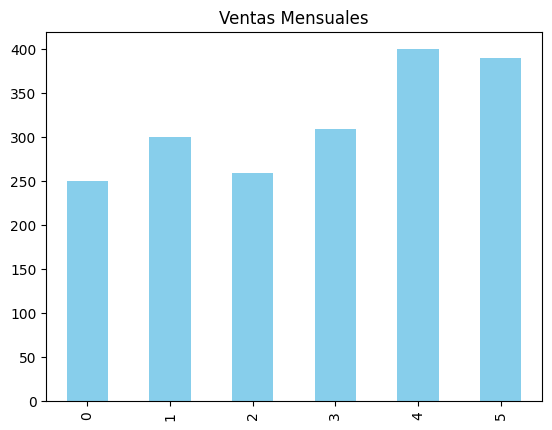

In [28]:
df['Ventas'].plot(kind='bar', color='skyblue', title='Ventas Mensuales')

Si se desea colocar el nombre del mes, debe colocarse como índice. El gráfico con elementos adicionales es el siguiente:

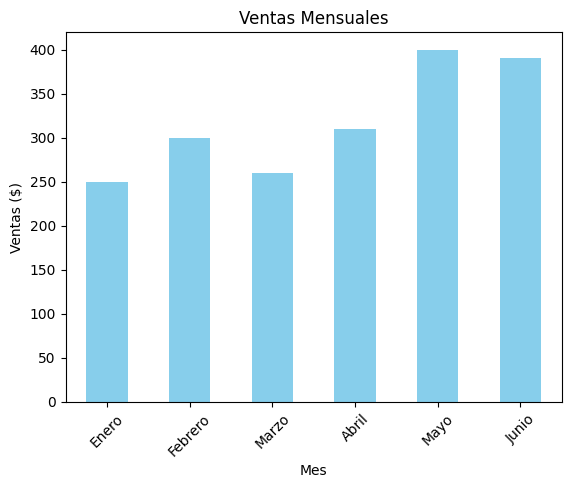

In [30]:
df.set_index('Mes')['Ventas'].plot(kind='bar', color='skyblue', title='Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.xticks(rotation=45)
plt.show()

Si el gráfico de barras se desa horizontal, se asigna `kind='barh'`:

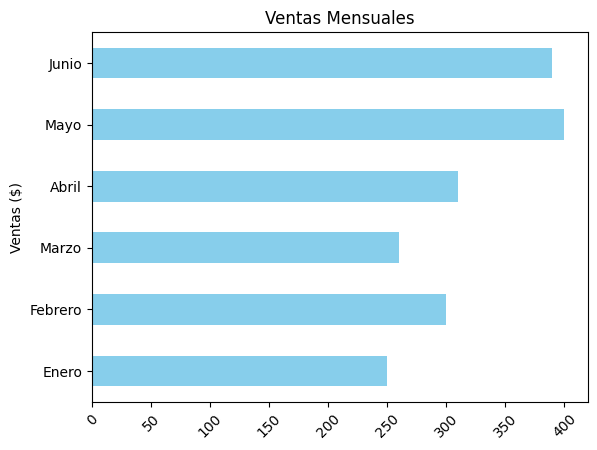

In [45]:
df.set_index('Mes')['Ventas'].plot(kind='barh', color='skyblue', title='Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.xticks(rotation=45)
plt.show()

##6.2. Histograma

Para generar un histograma de clientes:

<Axes: title={'center': 'Histograma de Clientes'}, ylabel='Frequency'>

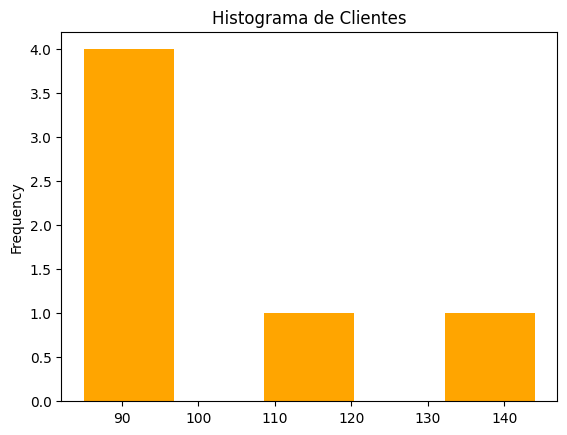

In [35]:
df['Clientes'].plot(kind='hist', bins=5, color='orange', title='Histograma de Clientes')

El histograma con más elementos:

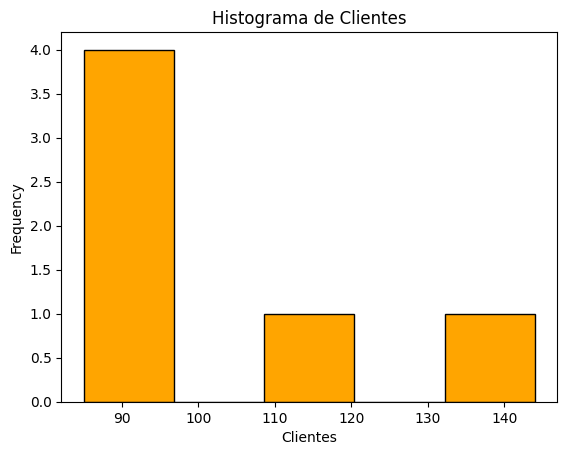

In [44]:
df['Clientes'].plot(kind='hist', bins=5, color='orange', edgecolor='black', title='Histograma de Clientes')
plt.xlabel('Clientes')
plt.show()

##6.3. Gráfico de Líneas

Para generar un gráfico de líneas de ventas en función de los costos:

<Axes: title={'center': 'Ventas vs Costos'}>

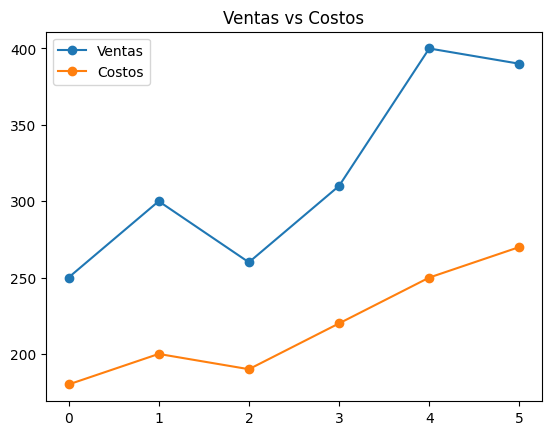

In [37]:
df[['Ventas', 'Costos']].plot(kind='line', marker='o', title='Ventas vs Costos')

Un gráfico indicando el mes en el índice y con más elementos:

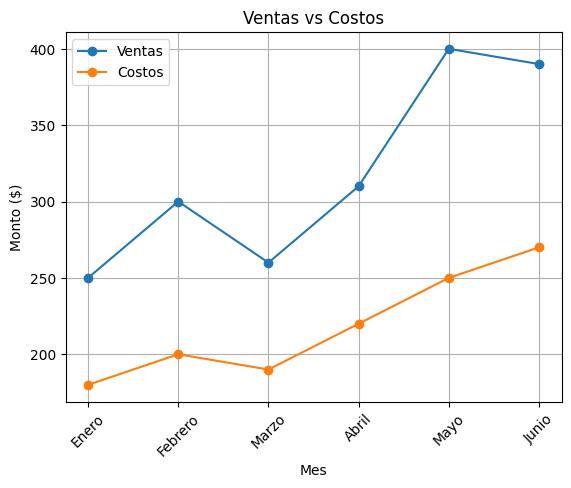

In [43]:
df.set_index('Mes')[['Ventas', 'Costos']].plot(kind='line', marker='o', title='Ventas vs Costos')
plt.ylabel('Monto ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##6.4. Scatter Plot

Para generar un gráfico tipo Scatter de Clientes vs Ventas con varios elementos:

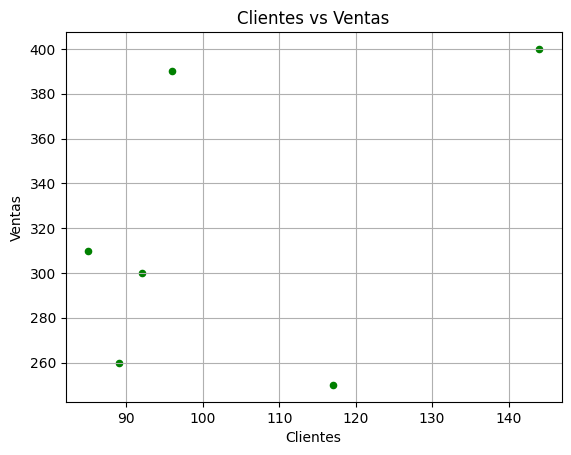

In [42]:
df.plot(kind='scatter', x='Clientes', y='Ventas', color='green', title='Clientes vs Ventas')
plt.grid(True)
plt.show()

##6.5. Boxplot

Para generar un gráfico tipo Boxplot de Ventas y Costos con varios elementos:

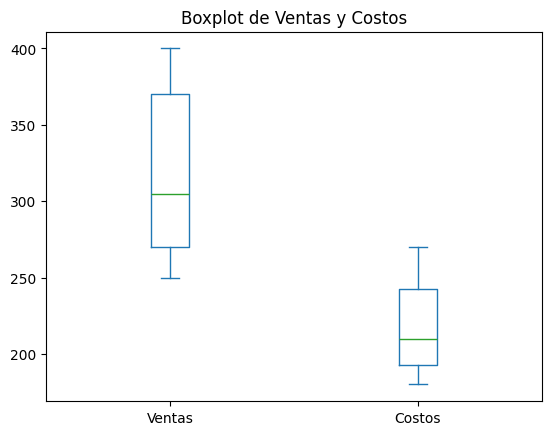

In [41]:
df[['Ventas', 'Costos']].plot(kind='box', title='Boxplot de Ventas y Costos')
plt.show()

##6.6. Gráfico de Área

Para generar un gráfico de Área de Ventas y Costos con varios elementos:

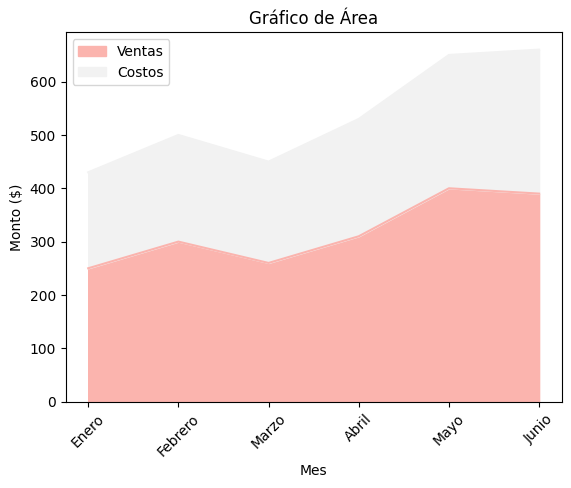

In [46]:
df.set_index('Mes')[['Ventas', 'Costos']].plot(kind='area', stacked=True, colormap='Pastel1', title='Gráfico de Área')
plt.ylabel('Monto ($)')
plt.xticks(rotation=45)
plt.show()

#7.Exporta el Dataframe a un archivo

Para guardar el DataFrame en un archivo  CSV:
```
df.to_csv("datos.csv", sep=';', index=False)
```
con:
- `index=False`: evita guardar índice
- `sep=';'`: especifica el separador, en este caso punto y coma

Para guardar el DataFrame en archivo  de excel:
```
df.to_excel('archivo.xlsx', sheet_name='HojaDatos',index=False)
```
con:
- `index=False`: evita guardar índice
- `sheet_name='HojaDatos'`: especifica el nombre de la hoja